# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

## 1.2 preprocessing of `project_subject_categories`

In [4]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [5]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Preprocessing of 'Teacher_prefix'

In [6]:
teacher_pre = []
for prefix in project_data['teacher_prefix'].values:
    if prefix==prefix:
        prefix = re.sub('[^A-Za-z0-9]','',prefix).lower()
        teacher_pre.append(prefix)
    else:
        teacher_pre.append(prefix)
    
project_data['teacher_prefix'] = teacher_pre

## Preprocessing of project_grade_category

In [7]:
project_grade_cat = []
for grade in project_data['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat.append(grade)
project_data['project_grade_category'] = project_grade_cat

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data['essay'] = list(project_data["essay"].apply(lambda x: x.lower()))

In [ ]:
project_data.head(2)

In [ ]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [11]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# Stratified Distribution between Train-Test-Cv(64-20-16)

In [10]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(project_data,project_data['project_is_approved'],test_size = 0.2, stratify = project_data['project_is_approved'])
X_train.drop(['project_is_approved'],axis=1,inplace=True)
X_test.drop(['project_is_approved'],axis=1,inplace=True)
#X_cv.drop(['project_is_approved'],axis=1,inplace=True)
print(X_train.shape)
print(X_test.shape)

(87398, 17)
(21850, 17)


In [12]:
X_train = pd.read_csv('X_train')
X_test = pd.read_csv('X_test')
y_train = pd.read_csv('Y_train',names = ['Unnamed:0','project_is_approved'])
y_test = pd.read_csv('Y_test',names = ['Unnamed:0','project_is_approved'])

In [13]:
project_grade_cat_train = []
for grade in X_train['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat_train.append(grade)
X_train['project_grade_category'] = project_grade_cat_train

In [14]:
project_grade_cat_test = []
for grade in X_test['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    grade = grade.replace(' ','_').lower()
    project_grade_cat_test.append(grade)
X_test['project_grade_category'] = project_grade_cat_test

In [7]:
y_train.head()

Unnamed:0  project_is_approved
0      82966                    1
1      67535                    1
2       6722                    1
3       1719                    1
4      75809                    1

# <h2><font color='red'> 1.4 Preprocessing of Essay on Trainig data</font></h2>

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 87398/87398 [00:51<00:00, 1692.32it/s]


# <h2><font color='red'> 1.4 Preprocessing of Essay on Test data</font></h2>

In [16]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 21850/21850 [00:13<00:00, 1665.48it/s]


In [ ]:
# after preprocesing
preprocessed_essays[20000]

# <h2><font color='black'> 1.4 Preprocessing of `project_title`</font></h2>

# <h2><font color='red'> 1.4 Preprocessing of Title on Training data</font></h2>

In [17]:
# similarly you can preprocess the titles also
preprocessed_titles_train =[]
for title in tqdm(X_train['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e.lower() not in stopwords)
        preprocessed_titles_train.append(des.lower().strip())        

100%|██████████| 87398/87398 [00:02<00:00, 33842.50it/s]


# <h2><font color='red'> 1.4 Preprocessing of Title on Test data</font></h2>

In [18]:
preprocessed_titles_test =[]
for title in tqdm(X_test['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e.lower() not in stopwords)
        preprocessed_titles_test.append(des.lower().strip()) 

100%|██████████| 21850/21850 [00:00<00:00, 34966.80it/s]


# Sentimental Analysis of Essay

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()
positive_tr,positive_ts,positive_cv=[],[],[]
negative_tr ,negative_ts,negative_cv= [],[],[]
neutral_tr,neutral_ts,neutral_cv = [],[],[]
comp_tr ,comp_ts,comp_cv= [],[],[]

    

# Training Data Sentiment

In [16]:
for i in tqdm(X_train['essay']):
    positive_tr.append(senti.polarity_scores(i)['pos'])
    negative_tr.append(senti.polarity_scores(i)['neg'])
    neutral_tr.append(senti.polarity_scores(i)['neu'])
    comp_tr.append(senti.polarity_scores(i)['compound'])
X_train['pos'] = positive_tr
X_train['neg'] = negative_tr
X_train['neu'] = neutral_tr
X_train['comp'] = comp_tr

100%|████████████████████████████████████████████████████████████████████████████| 87398/87398 [38:03<00:00, 38.27it/s]


# Test Data Sentiment

In [17]:
for i in tqdm(X_test['essay']):
    positive_ts.append(senti.polarity_scores(i)['pos'])
    negative_ts.append(senti.polarity_scores(i)['neg'])
    neutral_ts.append(senti.polarity_scores(i)['neu'])
    comp_ts.append(senti.polarity_scores(i)['compound'])
X_test['pos'] = positive_ts
X_test['neg'] = negative_ts
X_test['neu'] = neutral_ts
X_test['comp'] = comp_ts

100%|████████████████████████████████████████████████████████████████████████████| 21850/21850 [09:26<00:00, 38.57it/s]


## 1.5 Preparing data for models

In [ ]:
project_data.columns

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### <h2><font color = 'red'> One hot encoding of categories column in train,test,and cv data<font/><h2/>

In [19]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer.transform(preprocessed_essays_train)
categories_one_hot_test = vectorizer.transform(preprocessed_essays_test)
#categories_one_hot_cv = vectorizer.transform(preprocessed_essays_cv)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",categories_one_hot_test.shape)
#print("Shape of CV matrix after one hot encodig ",categories_one_hot_cv.shape)


['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of Train matrix after one hot encodig  (87398, 9)
Shape of Test matrix after one hot encodig  (21850, 9)


# <h2><font color = 'red'> One hot encoding of sub categories column in train,test,and cv data<font/><h2/>

In [20]:
# we use count vectorizer_sub to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_sub = CountVectorizer( lowercase=False, binary=True)
vectorizer_sub.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer_sub.transform(preprocessed_titles_train)
sub_categories_one_hot_test = vectorizer_sub.transform(preprocessed_titles_test)
#sub_categories_one_hot_cv = vectorizer_sub.transform(preprocessed_titles_cv)
print(vectorizer_sub.get_feature_names())
print("Shape of Train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
#print("Shape of CV matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of Train matrix after one hot encodig  (87398, 30)
Shape of Test matrix after one hot encodig  (21850, 30)


# <h2><font color = 'red'> One hot encoding of teacher prefix column in train,test,and cv data<font/><h2/>

In [21]:
#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer_prefix = CountVectorizer(lowercase = False,binary = True)
vectorizer_prefix = vectorizer_prefix.fit(X_train['teacher_prefix'].values.astype('U'))
prefix_one_hot_train = vectorizer_prefix.transform(X_train['teacher_prefix'].values.astype('U'))
#prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
prefix_one_hot_test = vectorizer_prefix.transform(X_test['teacher_prefix'].values.astype('U'))
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encoding ", prefix_one_hot_train.shape)
#print("Shape of matrix after one hot encoding ", prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", prefix_one_hot_test.shape)

['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']
Shape of matrix after one hot encoding  (87398, 6)
Shape of matrix after one hot encoding  (21850, 6)


# <h2><font color = 'red'> One hot encoding of project grade column in train,test,and cv data<font/><h2/>

In [22]:
vectorizer_grade = CountVectorizer(lowercase = False,binary = True)
vectorizer_grade = vectorizer_grade.fit(X_train['project_grade_category'].values.astype('U'))
project_grade_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values.astype('U'))
#project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values.astype('U'))
project_grade_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values.astype('U'))
print(vectorizer_grade.get_feature_names())
print("Shape of matrix after one hot encoding ", project_grade_one_hot_train.shape)
#print("Shape of matrix after one hot encoding ", project_grade_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", project_grade_one_hot_test.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encoding  (87398, 4)
Shape of matrix after one hot encoding  (21850, 4)


# <h2><font color = 'red'> One hot encoding of project grade column in train,test,and cv data<font/><h2/>

In [23]:
vectorizer_state = CountVectorizer(lowercase = False,binary = True)
vectorizer_state.fit(X_train['school_state'].values)
state_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
state_one_hot_test =  vectorizer_state.transform(X_test['school_state'].values)
#state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)
print(vectorizer_state.get_feature_names())
print("Shape of Train matrix after one hot encoding ", state_one_hot_train.shape)
print("Shape of Test matrix after one hot encoding ", state_one_hot_test.shape)
#print("Shape of cv matrix after one hot encoding ", state_one_hot_cv.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of Train matrix after one hot encoding  (87398, 51)
Shape of Test matrix after one hot encoding  (21850, 51)


# Essay and Title Words Count 

# Train Data

In [24]:
essay_word_counter_train = []
title_word_counter_train = []
for sent in preprocessed_essays_train:
    count = len(set(sent.split()))
    essay_word_counter_train.append(count)
for title in preprocessed_titles_train:
    count = len(set(title.split()))
    title_word_counter_train.append(count)
X_train['Essay_word_count'] = essay_word_counter_train
X_train['Title_word_count'] = title_word_counter_train

# Test Data

In [25]:
essay_word_counter_test = []
title_word_counter_test = []
for sent in preprocessed_essays_test:
    count = len(set(sent.split()))
    essay_word_counter_test.append(count)
for title in preprocessed_titles_test:
    count = len(set(title.split()))
    title_word_counter_test.append(count)
X_test['Essay_word_count'] = essay_word_counter_test
X_test['Title_word_count'] = title_word_counter_test

### 1.5.2 Vectorizing Text data

## Bag of words -  Essays and Titles

# <h2><font color = 'red'> Train data-Essay</font></h2>

In [26]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#training
vectorizer_essay = CountVectorizer(min_df=10)
essay_bow_train = vectorizer_essay.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",essay_bow_train.shape)

Shape of matrix after one hot encodig  (87398, 15130)


# <h2><font color = 'red'> Test data-Essay</font></h2>

In [27]:
#test
essay_bow_test = vectorizer_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

Shape of matrix after one hot encodig  (21850, 15130)


# <h2><font color = 'red'> Train data-Title</font></h2>

In [28]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#training
vectorizer_title = CountVectorizer(min_df=10)
title_bow_train = vectorizer_title.fit_transform(preprocessed_titles_train)
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

Shape of matrix after one hot encodig  (87398, 2819)


## Test Data - Title

In [29]:
#test
title_bow_test = vectorizer_title.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (21850, 2819)


# TFIDF - Essays and Titles

<h2><font color = 'red'>Essay on Train-Test dataset<font/><h2/>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
essay_tfidf_train = vectorizer_essay_tfidf.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)

Shape of matrix after one hot encodig  (87398, 15130)


In [33]:
essay_tfidf_test = vectorizer_essay_tfidf.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",essay_tfidf_test.shape)

Shape of matrix after one hot encoding  (21850, 15130)


In [32]:
vectorizer_title_tfidf = TfidfVectorizer(min_df = 10)
title_tfidf_train = vectorizer_title_tfidf.fit_transform(preprocessed_titles_train)
print("Shape of matrix after one hot encding ",title_tfidf_train.shape)

Shape of matrix after one hot encding  (87398, 2819)


In [34]:
title_tfidf_test = vectorizer_title_tfidf.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encding ",title_tfidf_test.shape)

Shape of matrix after one hot encding  (21850, 2819)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [17]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# avg w2v vectors on Preprocessed Essays - Training data

In [18]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 87398/87398 [00:57<00:00, 1524.94it/s]


87398
300


# avg w2v vectors on Preprocessed Essays - Test data

In [19]:
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:14<00:00, 1511.20it/s]


21850
300


# avg w2v vectors on Preprocessed Titles - Training data

In [20]:
#compute avg w2v for each title
avg_w2V_vectors_title_train =[]
for title in tqdm(preprocessed_titles_train):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_train.append(vector_title)
print(len(avg_w2V_vectors_title_train))
print(len(avg_w2V_vectors_title_train[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:03<00:00, 25322.40it/s]


87398
300


# avg w2v vectors on Preprocessed Titles - Test data

In [21]:
#compute avg w2v for each title
avg_w2V_vectors_title_test =[]
for title in tqdm(preprocessed_titles_test):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_test.append(vector_title)
print(len(avg_w2V_vectors_title_test))
print(len(avg_w2V_vectors_title_test[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 28211.97it/s]


21850
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [22]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf w2v vectors on Preprocessed Essay - Training data

In [23]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 87398/87398 [07:22<00:00, 197.71it/s]


87398
300


# tfidf w2v vectors on Preprocessed Essay - Test data

In [24]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [01:53<00:00, 193.29it/s]


21850
300


In [25]:
# Similarly you can vectorize f# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf w2v vectors on Preprocessed Titles - Training data

In [26]:
tfidf_w2v_vectors_title_train= []
for title in tqdm(preprocessed_titles_train):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:06<00:00, 12723.34it/s]


87398
300


# tfidf w2v vectors on Preprocessed Titles - Test data

In [27]:
# Similarly you can vectorize for title also
tfidf_w2v_vectors_title_test= []
for title in tqdm(preprocessed_titles_test):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)
print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:01<00:00, 12982.30it/s]


21850
300


In [44]:
X_train.to_csv('X_train')
X_test.to_csv('X_test')
y_train.to_csv('Y_train')
y_test.to_csv('Y_test')

### 1.5.3 Vectorizing Numerical features

In [35]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
#X_cv = pd.merge(X_cv,price_data, on ='id',how = 'left')
X_test = pd.merge(X_test,price_data, on ='id',how = 'left')

# Price

In [36]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(1, -1)).reshape(-1,1)
#price_standardized_cv = price_scalar.transform(X_cv['price'][0:12000].values.reshape(-1,1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)


# Quantity

In [37]:
# standardized quantity columns 
quantity_scaler = Normalizer()
quantity_scaler.fit(X_train['quantity'].values.reshape(1,-1))
#print(f"Mean :{quantity_scaler.mean_[0]},Standard Deviation :{np.sqrt(quantity_scaler.var_[0])}")
quantity_standardized_train = quantity_scaler.transform(X_train['quantity'].values.reshape(1,-1)).reshape(-1,1)
#quantity_standardized_cv = quantity_scaler.transform(X_cv['quantity'][0:12000].values.reshape(-1,1))
quantity_standardized_test = quantity_scaler.transform(X_test['quantity'].values.reshape(1,-1)).reshape(-1,1)

# No.of previously done Project

In [38]:
#standardized projects proposed by teachers
project_scaler = Normalizer()
project_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#print(f"Mean :{project_scaler.mean_[0]},Standard Deviation :{np.sqrt(project_scaler.var_[0])}")
project_standardized_train = project_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
#project_standardized_cv = project_scaler.transform(X_cv['teacher_number_of_previously_posted_projects'][0:12000].values.reshape(-1,1))
project_standardized_test = project_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

# Essay Count

In [39]:
#standardized Essay Count
Essay_count_scaler = Normalizer()
Essay_count_scaler.fit(X_train['Essay_word_count'].values.reshape(1,-1))
#print(f"Mean :{Essay_count_scaler.mean_[0]},Standard Deviation :{np.sqrt(Essay_count_scaler.var_[0])}")
Essay_count_standardized_train = Essay_count_scaler.transform(X_train['Essay_word_count'].values.reshape(1,-1)).reshape(-1,1)
Essay_count_standardized_test = Essay_count_scaler.transform(X_test['Essay_word_count'].values.reshape(1,-1)).reshape(-1,1)
#Essay_count_standardized_cv = Essay_count_scaler.transform(X_cv['Essay_word_count'][:45000].values.reshape(-1,1))

# Title Count

In [40]:
#standardized Title Count
title_count_scaler = Normalizer()
title_count_scaler.fit(X_train['Title_word_count'].values.reshape(1,-1))
#print(f"Mean :{title_count_scaler.mean_[0]},Standard Deviation :{np.sqrt(title_count_scaler.var_[0])}")
title_count_standardized_train = title_count_scaler.transform(X_train['Title_word_count'].values.reshape(1,-1)).reshape(-1,1)
title_count_standardized_test = title_count_scaler.transform(X_test['Title_word_count'].values.reshape(1,-1)).reshape(-1,1)
#title_count_standardized_cv = title_count_scaler.transform(X_cv['Title_word_count'][:45000].values.reshape(-1,1))

# Essay positive Sentiment

In [41]:
# normalize positive sentiment of essay 
pos_senti_scaler = Normalizer()
pos_senti_scaler.fit(X_train['pos'].values.reshape(1,-1))
essay_pos_train = pos_senti_scaler.transform(X_train['pos'].values.reshape(1,-1)).reshape(-1,1)
essay_pos_test = pos_senti_scaler.transform(X_test['pos'].values.reshape(1,-1)).reshape(-1,1)

# Essay Negative Sentiment

In [42]:
neg_senti_scaler = Normalizer()
neg_senti_scaler.fit(X_train['neg'].values.reshape(1,-1))
essay_neg_train = neg_senti_scaler.transform(X_train['neg'].values.reshape(1,-1)).reshape(-1,1)
essay_neg_test = neg_senti_scaler.transform(X_test['neg'].values.reshape(1,-1)).reshape(-1,1)

# Essay Neutral Sentiment

In [43]:
neu_senti_scaler = Normalizer()
neu_senti_scaler.fit(X_train['neu'].values.reshape(1,-1))
essay_neu_train = neu_senti_scaler.transform(X_train['neu'].values.reshape(1,-1)).reshape(-1,1)
essay_neu_test = neu_senti_scaler.transform(X_test['neu'].values.reshape(1,-1)).reshape(-1,1)

# Essay Compound Sentiment

In [44]:
comp_senti_scaler = Normalizer()
comp_senti_scaler.fit(X_train['comp'].values.reshape(1,-1))
essay_comp_train = comp_senti_scaler.transform(X_train['comp'].values.reshape(1,-1)).reshape(-1,1)
essay_comp_test = comp_senti_scaler.transform(X_test['comp'].values.reshape(1,-1)).reshape(-1,1)

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

In [45]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000])
               ,sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000])
               ,essay_bow_train[:45000],title_bow_train[:45000])).tocsr()


X_ts = hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000])       
              ,sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000])
               , essay_bow_test[:15000],title_bow_test[:15000])).tocsr()


In [45]:
# batch wise prediction
def proba_predict(model , data):
    y_pred_data = []
    n_loop = data.shape[0] - data.shape[0]%1000
    # here 1000 represents batch_size
    for i in range(0,n_loop,1000):
        y_pred_data.extend(model.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000!=0:
        y_pred_data.extend(model.predict_proba(data[n_loop:])[:,1])
    return(y_pred_data)


In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,auc

In [62]:
parameters = {"max_depth": [1, 5, 10, 50, 100, 500],"min_samples_split":[5, 10, 100, 500]}
model = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(model,param_grid=parameters,cv = 2,scoring = 'roc_auc')
clf.fit(X_tr,y_train[:45000])

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

# 3D Scatter Plot

In [65]:
depth= pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = train_auc)
splits = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = train_auc)    

In [64]:
train_auc = clf.cv_results_['mean_train_score']
test_auc = clf.cv_results_['mean_test_score']

In [66]:
trace = go.Scatter3d(
    x=train_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        symbol = 'cross',
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
)

In [67]:
import plotly.graph_objects as go
fig = go.Figure(data = [trace])
fig.add_trace(go.Scatter3d(
    x=test_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
))
fig.update_layout(title = "AUC Scores vs Depth and Splits",height = 600,showlegend = False)

In [75]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=500)
model.fit(X_tr,y_train[:45000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# ROC_AUC Curve

In [76]:
y_train_pred = proba_predict(model,X_tr)   
y_test_pred = proba_predict(model,X_ts)

fpr_train,tpr_train,thres_train = roc_curve(y_train[:45000], y_train_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:15000], y_test_pred)

fig = go.Figure()
fig.add_trace(go.Scatter(x = fpr_train,y = tpr_train,name='Train_AUC',text = "Train AUC Score ="+str(auc(fpr_train, tpr_train))))
fig.add_trace(go.Scatter(x = fpr_test,y = tpr_test,name = "Test_AUC",text = "Test AUC Score ="+str(auc(fpr_test, tpr_test))))
fig.add_trace(go.Scatter(x = np.linspace(0,1,600),y = np.linspace(0,1,600),name = '0.5 AUC Score'))

fig.update_layout(title = 'ROC_AUC SCORE',
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'True Positive Rate (TPR)')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "False Positive Rate (FPR)")))
fig.show()


In [81]:
def pred_using_threshold(proba,thresh,tpr,fpr):
    flag = thresh[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(flag,3))
    pred_auc = []
    for i in proba:
        if i>=flag:
            pred_auc.append(1)
        else:
            pred_auc.append(0)
    return pred_auc

# Confusion Matrix on Training Data with min_split = 500 and depth = 5.

the maximum value of tpr*(1-fpr) 0.4067154455970667 for threshold 0.872


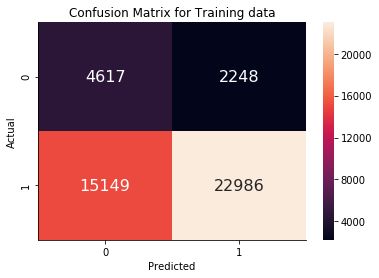

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:45000],pred_using_threshold(y_train_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# Confusion Matrix on Test Data with min_split = 500 and depth = 5.

the maximum value of tpr*(1-fpr) 0.4067154455970667 for threshold 0.872


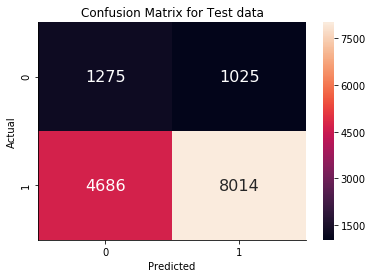

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:15000],pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

In [ ]:
X_tr.shape

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [46]:
import pydotplus
from sklearn.tree import export_graphviz as eg
import collections
from IPython.display import Image

In [52]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=500)
model.fit(X_tr,y_train[:45000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
features_names = []
for i in vectorizer.get_feature_names():
    features_names.append(i)
for i in vectorizer_sub.get_feature_names():
    features_names.append(i)
for i in vectorizer_prefix.get_feature_names():
    features_names.append(i)
for i in vectorizer_grade.get_feature_names():
    features_names.append(i)
for i in vectorizer_state.get_feature_names():
    features_names.append(i)

In [49]:
features_names.append("Price")
features_names.append("Quantity")
features_names.append("Previously done projects")
features_names.append("Essay Counts")
features_names.append("Title Counts")
features_names.append("Essay_pos_senti")
features_names.append("Essay_neg_senti")
features_names.append("Essay_neu_senti")
features_names.append("Essay_comp_senti")

In [50]:
for i in vectorizer_essay.get_feature_names():
    features_names.append(i)
for i in vectorizer_title.get_feature_names():
    features_names.append(i)

In [51]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [52]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\patha\Desktop\graphviz'

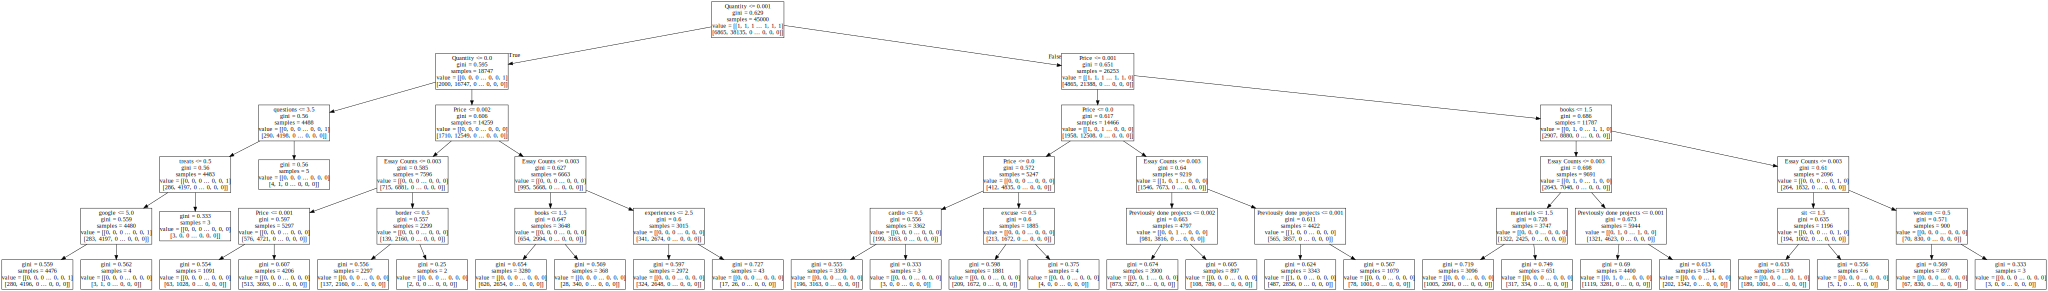

In [53]:
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(model, out_file=None,feature_names=features_names) 
graph = graphviz.Source(dot_data) 
graph

# categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [49]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000])
               ,sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000]),essay_tfidf_train[:45000],title_tfidf_train[:45000])).tocsr()


X_ts =  hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000])
                 ,sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000]),essay_tfidf_test[:15000],title_tfidf_test[:15000])).tocsr()

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,auc

In [97]:
parameters = {"max_depth": [1, 5, 10, 50, 100, 500],"min_samples_split":[5, 10, 100, 500]}
model = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(model,param_grid=parameters,cv = 2,scoring = 'roc_auc')
clf.fit(X_tr,y_train[:45000])

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [5]:
!pip install python-graphviz

  ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [ ]:
!pip uninstall graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

# 3D Scatter Plot

In [98]:
train_auc = clf.cv_results_['mean_train_score']
test_auc = clf.cv_results_['mean_test_score']

In [99]:
depth= pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = train_auc)
splits = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = train_auc)    

In [100]:
trace = go.Scatter3d(
    x=train_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        symbol = 'cross',
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
)

In [101]:
import plotly.graph_objects as go
fig = go.Figure(data = [trace])
fig.add_trace(go.Scatter3d(
    x=test_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
))
fig.update_layout(title = "AUC Scores vs Depth and Splits",height = 600,showlegend = False)

In [104]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=500)
model.fit(X_tr,y_train[:45000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# ROC_AUC Curve

In [105]:
y_train_pred = proba_predict(model,X_tr)   
y_test_pred = proba_predict(model,X_ts)

fpr_train,tpr_train,thres_train = roc_curve(y_train[:45000], y_train_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:15000], y_test_pred)

fig = go.Figure()
fig.add_trace(go.Scatter(x = fpr_train,y = tpr_train,name='Train_AUC',text = "Train AUC Score ="+str(auc(fpr_train, tpr_train))))
fig.add_trace(go.Scatter(x = fpr_test,y = tpr_test,name = "Test_AUC",text = "Test AUC Score ="+str(auc(fpr_test, tpr_test))))
fig.add_trace(go.Scatter(x = np.linspace(0,1,600),y = np.linspace(0,1,600),name = '0.5 AUC Score'))

fig.update_layout(title = 'ROC_AUC SCORE',
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'True Positive Rate (TPR)')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "False Positive Rate (FPR)")))
fig.show()


# Confusion Matrix on Training Data with min_split = 500 and depth = 5.

the maximum value of tpr*(1-fpr) 0.4045248685741068 for threshold 0.86


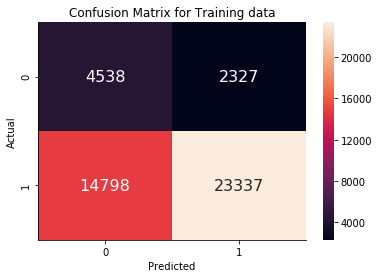

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:45000],pred_using_threshold(y_train_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# Confusion Matrix on Test Data with min_split = 500 and depth = 5.

the maximum value of tpr*(1-fpr) 0.4045248685741068 for threshold 0.86


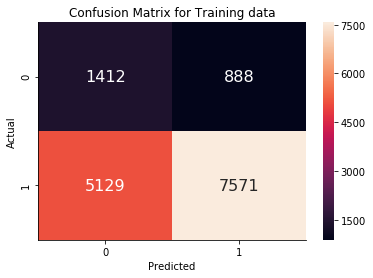

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:15000],pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [47]:
import pydotplus
from sklearn.tree import export_graphviz as eg
import collections
from IPython.display import Image

In [56]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
model.fit(X_tr,y_train[:45000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
features_names = []
for i in vectorizer.get_feature_names():
    features_names.append(i)
for i in vectorizer_sub.get_feature_names():
    features_names.append(i)
for i in vectorizer_prefix.get_feature_names():
    features_names.append(i)
for i in vectorizer_grade.get_feature_names():
    features_names.append(i)
for i in vectorizer_state.get_feature_names():
    features_names.append(i)

In [49]:
features_names.append("Price")
features_names.append("Quantity")
features_names.append("Previously done projects")
features_names.append("Essay Counts")
features_names.append("Title Counts")
features_names.append("Essay_pos_senti")
features_names.append("Essay_neg_senti")
features_names.append("Essay_neu_senti")
features_names.append("Essay_comp_senti")

In [50]:
for i in vectorizer_essay_tfidf.get_feature_names():
    features_names.append(i)
for i in vectorizer_title_tfidf.get_feature_names():
    features_names.append(i)

In [54]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\patha\Desktop\graphviz'

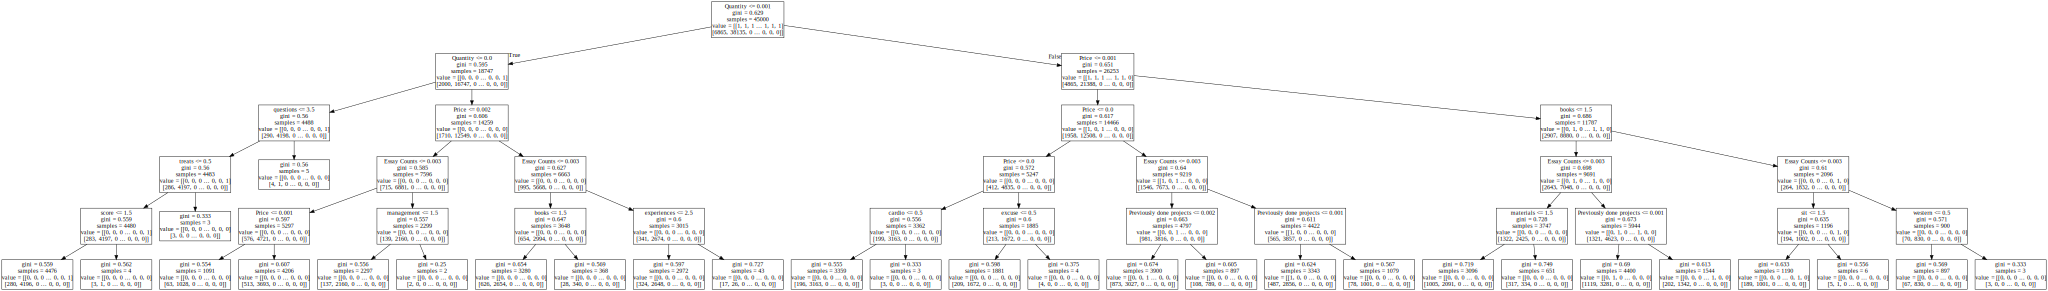

In [57]:
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(model, out_file=None,feature_names=features_names) 
graph = graphviz.Source(dot_data) 
graph

# categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [38]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000]),
               sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000]),
               avg_w2V_vectors_title_train[:45000],avg_w2v_vectors_essays_train[:45000])).tocsr()


X_ts = hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000]) ,
               sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000]),
               avg_w2V_vectors_title_test[:15000],avg_w2v_vectors_essays_test[:15000])).tocsr()


In [55]:
parameters = {"max_depth": [1, 5, 10, 50, 100, 500],"min_samples_split":[5, 10, 100, 500]}
model = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(model,param_grid=parameters,cv = 2,scoring = 'roc_auc')
clf.fit(X_tr,y_train[:45000]['project_is_approved'])

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [56]:
train_auc = clf.cv_results_['mean_train_score']
test_auc = clf.cv_results_['mean_test_score']

# Scatter 3D plot

In [57]:
depth= pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = train_auc)
splits = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = train_auc)    

In [58]:
trace = go.Scatter3d(
    x=train_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        symbol = 'cross',
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
)

In [59]:
import plotly.graph_objects as go
fig = go.Figure(data = [trace])
fig.add_trace(go.Scatter3d(
    x=test_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
))
fig.update_layout(title = "AUC Scores vs Depth and Splits",height = 600,showlegend = False)

In [58]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=500)
print()
model.fit(X_tr,y_train[:45000]["project_is_approved"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
y_train_pred = proba_predict(model,X_tr)   
y_test_pred = proba_predict(model,X_ts)

fpr_train,tpr_train,thres_train = roc_curve(y_train[:45000]["project_is_approved"], y_train_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:15000]["project_is_approved"], y_test_pred)
fig = go.Figure()
fig.add_trace(go.Scatter(x = fpr_train,y = tpr_train,name='Train_AUC',text = "Train AUC Score ="+str(auc(fpr_train, tpr_train))))
fig.add_trace(go.Scatter(x = fpr_test,y = tpr_test,name = "Test_AUC",text = "Test AUC Score ="+str(auc(fpr_test, tpr_test))))
fig.add_trace(go.Scatter(x = np.linspace(0,1,600),y = np.linspace(0,1,600),name = '0.5 AUC Score'))

fig.update_layout(title = 'ROC_AUC SCORE',
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'True Positive Rate (TPR)')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "False Positive Rate (FPR)")))
fig.show()


the maximum value of tpr*(1-fpr) 0.40352193032171624 for threshold 0.84


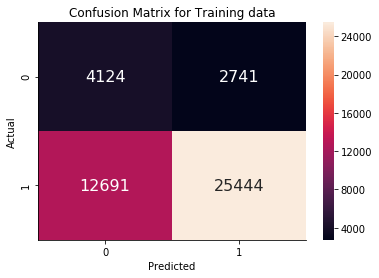

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:45000]['project_is_approved'],pred_using_threshold(y_train_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

the maximum value of tpr*(1-fpr) 0.40352193032171624 for threshold 0.84


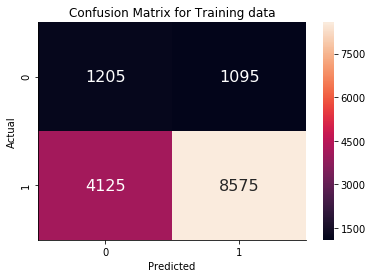

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:15000]['project_is_approved'],pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# WordCloud For False Positive DataPoints in Test Data

In [131]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pred_res = pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)
df = pd.DataFrame({"Actual":list(y_test[:15000]["project_is_approved"]),"Predicted":pred_res})
false_positive_df = df[df.Actual == 0][df.Predicted==1]

the maximum value of tpr*(1-fpr) 0.41936472288476434 for threshold 0.829


In [132]:
false_positive_df = X_test.loc[list(false_positive_df.index)]
Essay = list(false_positive_df['essay'].values)
tot_text = " "
for text in Essay:
    tot_text = tot_text + text


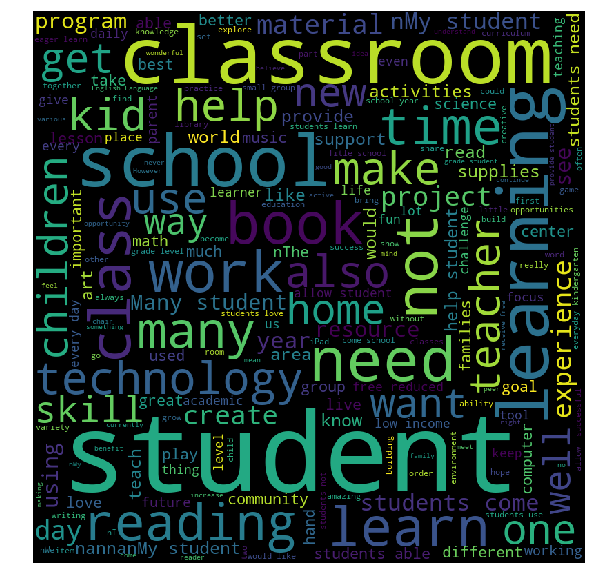

In [135]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tot_text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Box plots of False Positive Data Points on <h1><font color = 'red'>PRICE</font></h1>

In [136]:
from plotly import express as px
fig = px.box(false_positive_df,y = 'price')
fig.show()

# PDF on Previously Posted Project Column Data

In [137]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list(false_positive_df['teacher_number_of_previously_posted_projects'].values)],group_labels = ['distplot'])
fig.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [126]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr =  hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000]),
               sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000]),
                tfidf_w2v_vectors_title_train[:45000],tfidf_w2v_vectors[:45000])).tocsr()


X_ts =  hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000]),
                sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000]),
               tfidf_w2v_vectors_title_test[:15000],tfidf_w2v_vectors_test[:15000])).tocsr()


In [61]:
parameters = {"max_depth": [1, 5, 10, 50, 100, 500],"min_samples_split":[5, 10, 100, 500]}
model = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(model,param_grid=parameters,cv = 2,scoring = 'roc_auc')
clf.fit(X_tr,y_train[:45000]["project_is_approved"])

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [62]:
train_auc = clf.cv_results_['mean_train_score']
test_auc = clf.cv_results_['mean_test_score']

In [63]:
depth= pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = train_auc)
splits = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = train_auc)    

In [64]:
trace = go.Scatter3d(
    x=train_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        symbol = 'cross',
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
)

In [65]:
import plotly.graph_objects as go
fig = go.Figure(data = [trace])
fig.add_trace(go.Scatter3d(
    x=test_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
))
fig.update_layout(title = "AUC Scores vs Depth and Splits",height = 600,showlegend = False)

In [139]:
model = DecisionTreeClassifier(max_depth=5,min_samples_split=500)
model.fit(X_tr,y_train[:45000]["project_is_approved"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# ROC_AUC Curve

In [140]:
y_train_pred = proba_predict(model,X_tr)   
y_test_pred = proba_predict(model,X_ts)

fpr_train,tpr_train,thres_train = roc_curve(y_train[:45000]["project_is_approved"], y_train_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:15000]["project_is_approved"], y_test_pred)

fig = go.Figure()
fig.add_trace(go.Scatter(x = fpr_train,y = tpr_train,name='Train_AUC',text = "Train AUC Score ="+str(auc(fpr_train, tpr_train))))
fig.add_trace(go.Scatter(x = fpr_test,y = tpr_test,name = "Test_AUC",text = "Test AUC Score ="+str(auc(fpr_test, tpr_test))))
fig.add_trace(go.Scatter(x = np.linspace(0,1,600),y = np.linspace(0,1,600),name = '0.5 AUC Score'))

fig.update_layout(title = 'ROC_AUC SCORE',
                  xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text = 'True Positive Rate (TPR)')),
                 yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text = "False Positive Rate (FPR)")))
fig.show()


the maximum value of tpr*(1-fpr) 0.41936472288476434 for threshold 0.829


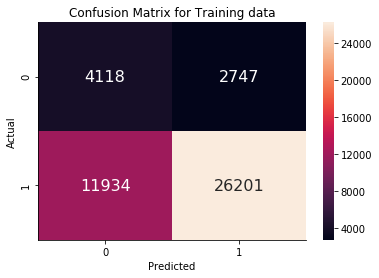

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:45000]["project_is_approved"],pred_using_threshold(y_train_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

the maximum value of tpr*(1-fpr) 0.41936472288476434 for threshold 0.829


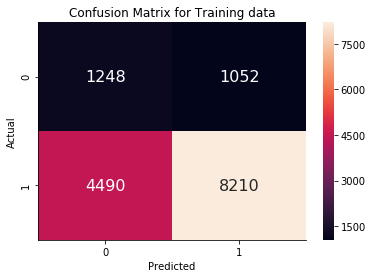

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:15000]["project_is_approved"],pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# WordCloud For False Positive DataPoints in Test Data

In [143]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pred_res = pred_using_threshold(y_test_pred,thres_train,tpr_train,fpr_train)
df = pd.DataFrame({"Actual":list(y_test[:15000]["project_is_approved"]),"Predicted":pred_res})
false_positive_df = df[df.Actual == 0][df.Predicted==1]

the maximum value of tpr*(1-fpr) 0.41936472288476434 for threshold 0.829


In [144]:
false_positive_df = X_test.loc[list(false_positive_df.index)]
Essay = list(false_positive_df['essay'].values)
tot_text = " "
for text in Essay:
    tot_text = tot_text + text


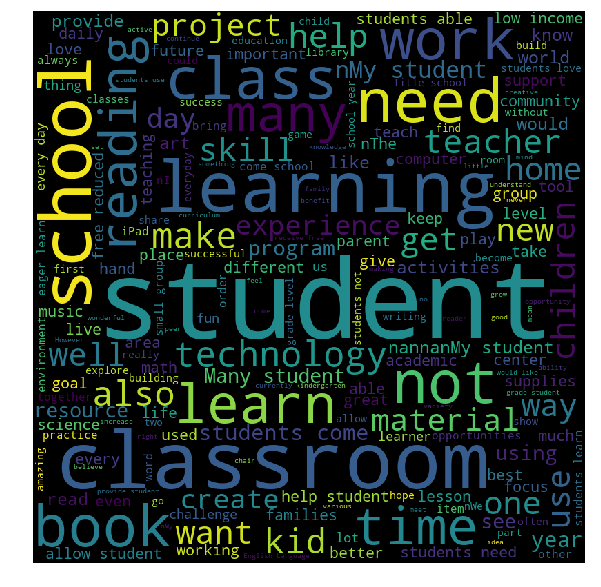

In [145]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tot_text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Box plots of False Positive Data Points on <h1><font color = 'red'>PRICE</font></h1>

In [146]:
from plotly import express as px
fig = px.box(false_positive_df,y = 'price')
fig.show()

# PDF on Previously Posted Project Column Data

In [147]:
import plotly.figure_factory as ff
fig = ff.create_distplot([list(false_positive_df['teacher_number_of_previously_posted_projects'].values)],group_labels = ['distplot'])
fig.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [64]:
# Please write all the code with proper documentation
#from xgboost import XGBClassifier
#import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:45000],sub_categories_one_hot_train[:45000],prefix_one_hot_train[:45000],
project_grade_one_hot_train[:45000],state_one_hot_train[:45000],sparse.csr_matrix(price_standardized_train[:45000]),
        sparse.csr_matrix(quantity_standardized_train[:45000]),sparse.csr_matrix(project_standardized_train[:45000]),
               sparse.csr_matrix(Essay_count_standardized_train[:45000]),sparse.csr_matrix(title_count_standardized_train[:45000])
               ,sparse.csr_matrix(essay_pos_train[:45000]),sparse.csr_matrix(essay_neg_train[:45000]),sparse.csr_matrix(essay_neu_train[:45000]),
               sparse.csr_matrix(essay_comp_train[:45000]),essay_tfidf_train[:45000],title_tfidf_train[:45000])).tocsr()


X_ts =  hstack((categories_one_hot_test[:15000],sub_categories_one_hot_test[:15000],prefix_one_hot_test[:15000],
project_grade_one_hot_test[:15000],state_one_hot_test[:15000],sparse.csr_matrix(price_standardized_test[:15000]),
        sparse.csr_matrix(quantity_standardized_test[:15000]),sparse.csr_matrix(project_standardized_test[:15000]),
        sparse.csr_matrix(Essay_count_standardized_test[:15000]),sparse.csr_matrix(title_count_standardized_test[:15000])
                 ,sparse.csr_matrix(essay_pos_test[:15000]),sparse.csr_matrix(essay_neg_test[:15000]),sparse.csr_matrix(essay_neu_test[:15000]),
               sparse.csr_matrix(essay_comp_test[:15000]),essay_tfidf_test[:15000],title_tfidf_test[:15000])).tocsr()

In [ ]:
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,prefix_one_hot_train,
project_grade_one_hot_train,state_one_hot_train,sparse.csr_matrix(price_standardized_train),
        sparse.csr_matrix(quantity_standardized_train),sparse.csr_matrix(project_standardized_train),
               sparse.csr_matrix(Essay_count_standardized_train),sparse.csr_matrix(title_count_standardized_train)
               ,sparse.csr_matrix(essay_pos_train),sparse.csr_matrix(essay_neg_train),sparse.csr_matrix(essay_neu_train),
               sparse.csr_matrix(essay_comp_train),essay_tfidf_train,title_tfidf_train)).tocsr()


X_ts =  hstack((categories_one_hot_test,sub_categories_one_hot_test,prefix_one_hot_test,
project_grade_one_hot_test,state_one_hot_test,sparse.csr_matrix(price_standardized_test),
        sparse.csr_matrix(quantity_standardized_test),sparse.csr_matrix(project_standardized_test),
        sparse.csr_matrix(Essay_count_standardized_test),sparse.csr_matrix(title_count_standardized_test)
                 ,sparse.csr_matrix(essay_pos_test),sparse.csr_matrix(essay_neg_test),sparse.csr_matrix(essay_neu_test),
               sparse.csr_matrix(essay_comp_test),essay_tfidf_test,title_tfidf_test)).tocsr()

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,auc

In [71]:
model = DecisionTreeClassifier(max_depth=10,min_samples_split=100)
model.fit(X_tr,y_train[:45000]["project_is_approved"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
tfidf_pos_features_names = []
for i in vectorizer.get_feature_names():
    tfidf_pos_features_names.append(i)
for i in vectorizer_sub.get_feature_names():
    tfidf_pos_features_names.append(i)
for i in vectorizer_prefix.get_feature_names():
    tfidf_pos_features_names.append(i)
for i in vectorizer_grade.get_feature_names():
    tfidf_pos_features_names.append(i)
for i in vectorizer_state.get_feature_names():
    tfidf_pos_features_names.append(i)

In [67]:
tfidf_pos_features_names.append("Price")
tfidf_pos_features_names.append("Quantity")
tfidf_pos_features_names.append("Previously done projects")
tfidf_pos_features_names.append("Essay Counts")
tfidf_pos_features_names.append("Title Counts")
tfidf_pos_features_names.append("Essay Pos Senti")
tfidf_pos_features_names.append("Essay Neg Senti")
tfidf_pos_features_names.append("Essay Neu Senti")
tfidf_pos_features_names.append("Essay Comp Ssenti")

In [68]:
for i in vectorizer_essay_tfidf.get_feature_names():
    tfidf_pos_features_names.append(i)
for i in vectorizer_title_tfidf.get_feature_names():
    tfidf_pos_features_names.append(i)

In [81]:
len(tfidf_pos_features_names)

18058

In [72]:
X_new_feature_df = pd.DataFrame({"features":tfidf_pos_features_names,"Feature_importance":list(model.feature_importances_)})

In [73]:
X_new_feature_df = X_new_feature_df[X_new_feature_df['Feature_importance']!=0]

Text(0, 0.5, 'Relative Feature Importance  ')

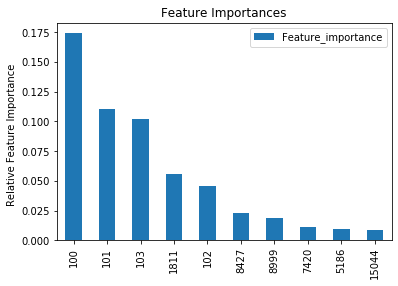

In [74]:
X_new_feature_df.sort_values(by=['Feature_importance'],ascending = False)[:10].plot.bar(y='Feature_importance',title='Feature Importances', rot=90)
plt.ylabel('Relative Feature Importance  ')

In [76]:
dataframe = pd.DataFrame(X_tr.toarray())

In [77]:
new_data = dataframe[list(X_new_feature_df.index)]

In [75]:
parameters = {"max_depth": [1, 5, 10, 50, 100, 500],"min_samples_split":[5, 10, 100, 500]}
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
clf = GridSearchCV(model,param_grid=parameters,cv = 2,scoring = 'roc_auc')
print()
clf.fit(new_data,y_train[:45000]["project_is_approved"])

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [76]:
train_auc = clf.cv_results_['mean_train_score']
test_auc = clf.cv_results_['mean_test_score']
depth= pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500],index = train_auc)
splits = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500], index = train_auc)    

In [77]:
trace = go.Scatter3d(
    x=train_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        symbol = 'cross',
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
)

In [78]:
import plotly.graph_objects as go
fig = go.Figure(data = [trace])
fig.add_trace(go.Scatter3d(
    x=test_auc, y=splits, z=depth,
    mode = 'markers+text', showlegend = True,
    hovertext = ['AUC_Score','Minimum splits','Depth'],
    marker=dict(
        size=8,
        color= depth,#'rgba(255,152,75,0.8)',
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    ),
    textfont=dict(
        family="sans serif",
        size=7,
        color="LightSeaGreen")
   
))
fig.update_layout(title = "AUC Scores vs Depth and Splits",height = 600,showlegend = False)

In [85]:
import pydotplus
from sklearn.tree import export_graphviz as eg
import collections
from IPython.display import Image

In [78]:
model = DecisionTreeClassifier(max_depth=10,min_samples_split=100)
model.fit(new_data,y_train[:45000]["project_is_approved"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [59]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\patha\Desktop\graphviz'

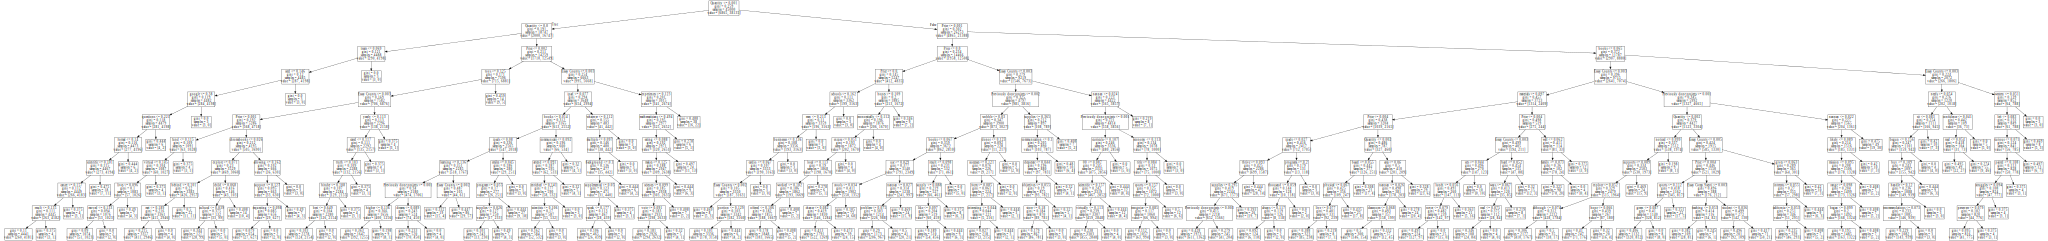

In [87]:
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(model, out_file=None,feature_names=list(X_new_feature_df['features'].values) )
graph = graphviz.Source(dot_data) 
graph

In [86]:
X_new_feature_df['features'].values

array(['Price', 'Quantity', 'Previously done projects', 'Essay Counts',
       'Essay Comp Ssenti', '00', 'allowing', 'although', 'always',
       'area', 'attend', 'background', 'based', 'began', 'begun',
       'behind', 'binder', 'books', 'businesses', 'buy', 'california',
       'cancer', 'cardio', 'cared', 'chance', 'child', 'chromebooks',
       'classroom', 'communicate', 'communication', 'confidence',
       'cultural', 'curious', 'curricula', 'desperate', 'donor', 'dreams',
       'eating', 'economically', 'economy', 'enriched', 'excuse',
       'experiences', 'explore', 'family', 'form', 'formal', 'fund',
       'gives', 'google', 'green', 'handle', 'hard', 'higher', 'hope',
       'hopes', 'interesting', 'interests', 'ipad', 'ipads', 'kid',
       'learning', 'left', 'like', 'likely', 'live', 'lives', 'local',
       'lunch', 'makes', 'materials', 'men', 'met', 'mission', 'moved',
       'multiple', 'nannan', 'needs', 'never', 'noticed', 'objectives',
       'offered', 'pair

<h1>3. Conclusion</h1>

In [63]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Depth","Splits", "AUC"]

x.add_row(["BOW", "Decison Tree", 5,500, 0.633])
x.add_row(["TFIDF", "Decison Tree", 5,500, 0.644])
x.add_row(["AVG W2V", "Decison Tree", 5,500, 0.62import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(model, out_file=None,feature_names=features_names) 
graph = graphviz.Source(dot_data) 
graph7])
x.add_row(["TFIDF W2V", "Decison Tree", 10,500, 0.658])

print(x)

+------------+--------------+-------+--------+-------+
| Vectorizer |    Model     | Depth | Splits |  AUC  |
+------------+--------------+-------+--------+-------+
|    BOW     | Decison Tree |   5   |  500   | 0.633 |
|   TFIDF    | Decison Tree |   5   |  500   | 0.644 |
|  AVG W2V   | Decison Tree |   5   |  500   | 0.627 |
| TFIDF W2V  | Decison Tree |   10  |  500   | 0.658 |
+------------+--------------+-------+--------+-------+
